Table of Contents:
### 1. [Imports](#importing-files)
### 2. [Acquire & Prepare](#acquire--prepare)
### 3. [Explore](#explore)
3a. [Exploring Continious Distributions](#explore-continious-distributions)\
3b. [Exploring Categorical Distributions](#exploring-categorical-distributions)\
3c. [Exploring Correlations](#explore-correlations-with-similar-data)
    

## Importing Files

In [1]:
# My created .py files for modularization
import env
import os
import acquire
import prepare
# Array and Dataframes
import numpy as np
import pandas as pd
# Load datasets
from pydataset import data
# Evaluation: Visualization
import seaborn as sns
import matplotlib.pyplot as plt
# Evaluation: Statistical Analysis
from scipy import stats
# Modeling
from sklearn.linear_model import LogisticRegression as lr
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

## Acquire & Prepare
*Completed before hand*

In [2]:
# combination of acquire & prepare in one function
telco = prepare.prep_telco()

In [3]:
# view all columns with associated values to observe
pd.set_option('display.max_columns', None)


In [4]:
telco.dtypes

customer_id                              object
gender                                   object
senior_citizen                            int64
partner                                  object
dependents                               object
tenure                                    int64
phone_service                            object
multiple_lines                           object
internet_service_type_id                  int64
online_security                          object
online_backup                            object
streaming_tv                             object
streaming_movies                         object
contract_type_id                          int64
paperless_billing                        object
payment_type_id                           int64
monthly_charges                         float64
total_charges                           float64
churn                                    object
internet_service_type                    object
payment_type                            

In [5]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   customer_id                           7043 non-null   object 
 1   gender                                7043 non-null   object 
 2   senior_citizen                        7043 non-null   int64  
 3   partner                               7043 non-null   object 
 4   dependents                            7043 non-null   object 
 5   tenure                                7043 non-null   int64  
 6   phone_service                         7043 non-null   object 
 7   multiple_lines                        7043 non-null   object 
 8   internet_service_type_id              7043 non-null   int64  
 9   online_security                       7043 non-null   object 
 10  online_backup                         7043 non-null   object 
 11  streaming_tv     

In [28]:
telco.sample(5)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,internet_service_type,payment_type,contract_type,partner_binary,dependents_binary,phone_service_binary,gender_binary,paperless_billing_binary,churn_binary,multiple_lines_no phone service,multiple_lines_yes,online_security_yes,online_backup_yes,payment_type_credit card (automatic),payment_type_electronic check,payment_type_mailed check,contract_type_one year,contract_type_two year,tech_support_yes,streaming_tv_yes,streaming_movies_yes,device_protection_yes,contract_type_month_to_month
465,0679-TDGAK,Male,0,Yes,Yes,50,Yes,No,1,Yes,No,Yes,Yes,2,No,1,75.50,4025.60,No,DSL,Electronic check,One year,1,1,1,1,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0
6032,7021-XSNYE,Male,0,Yes,Yes,7,No,No phone service,1,Yes,No,No,Yes,3,No,4,49.65,305.55,No,DSL,Credit card (automatic),Two year,1,1,0,1,0,0,1,0,1,0,1,0,0,0,1,1,0,1,1,0
313,0463-WZZKO,Male,0,No,No,3,Yes,No,3,No internet service,No internet service,No internet service,No internet service,1,Yes,4,20.75,67.10,No,None,Credit card (automatic),Month-to-month,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
6167,7416-CKTEP,Female,0,Yes,No,57,Yes,No,3,No internet service,No internet service,No internet service,No internet service,3,Yes,3,19.60,1134.25,No,None,Bank transfer (automatic),Two year,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3391,6366-XIVKZ,Female,0,Yes,Yes,13,Yes,No,1,Yes,No,No,Yes,1,Yes,2,63.15,816.80,No,DSL,Mailed check,Month-to-month,1,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1


## Explore

In [29]:
# Distinguishing between numeric and categorical data types
explore = telco[['gender','partner','dependents','tenure','phone_service','multiple_lines','online_security','online_backup',\
    'streaming_tv','streaming_movies','paperless_billing','monthly_charges','total_charges','churn','internet_service_type',\
        'payment_type','contract_type']]

In [30]:
# separating our numeric and categorical columns:
# initialize two empty lists for each type:
cat_cols, num_cols = [], []
# set up a for loop to build those lists out:
# so for every column in explore_columns:
for col in explore:
    # check to see if its an object type,
    # if so toss it in categorical
    if telco[col].dtype == 'O':
        cat_cols.append(col)
    # otherwise if its numeric:
    else:
        # check to see if we have more than just a few values:
        # if thats the case, toss it in categorical
        if telco[col].nunique() < 10:
            cat_cols.append(col)
        # and otherwise call it continuous by elimination
        else:
            num_cols.append(col)

## Exploring: Categorical Distributions

In [55]:
# compiling categorical columns
cat_cols = telco[cat_cols]

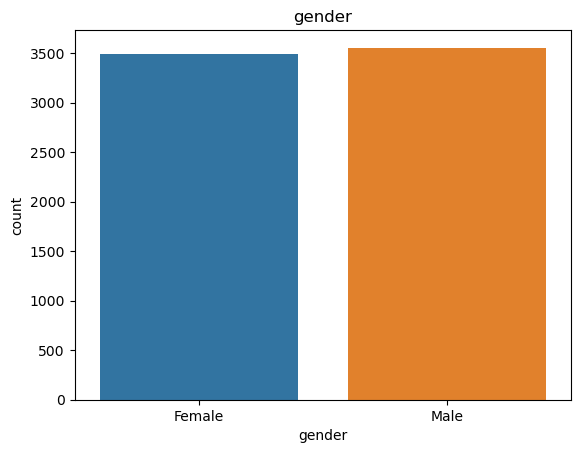

-------------------------------------------------------------


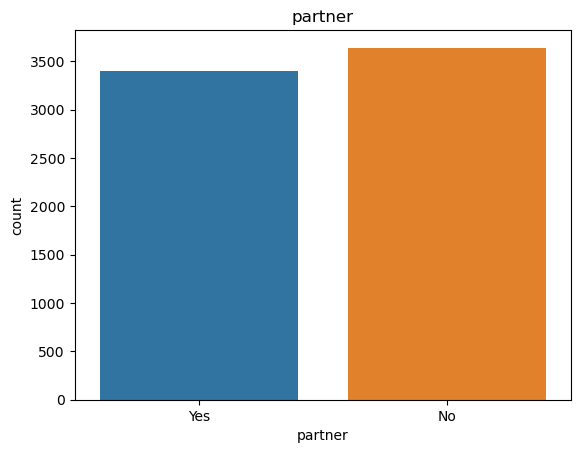

-------------------------------------------------------------


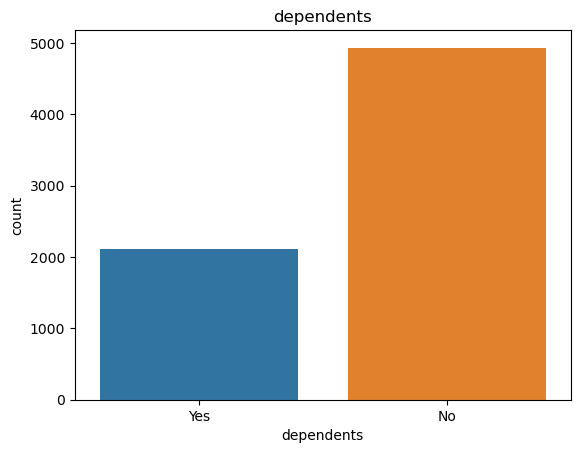

-------------------------------------------------------------


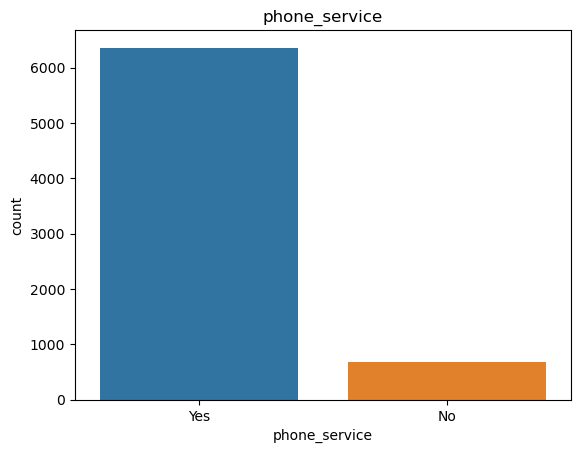

-------------------------------------------------------------


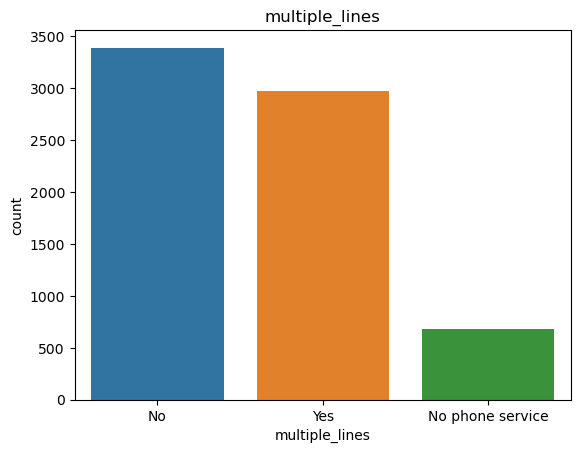

-------------------------------------------------------------


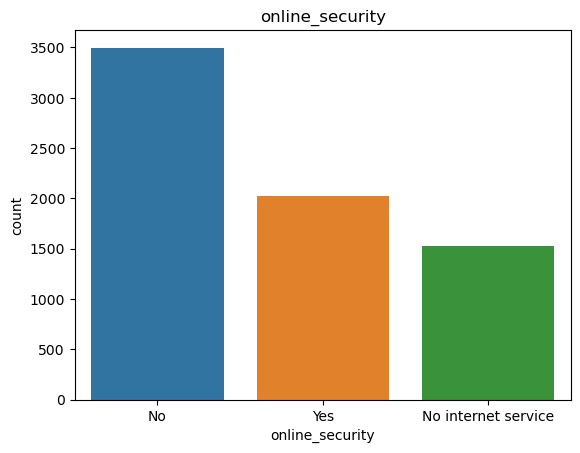

-------------------------------------------------------------


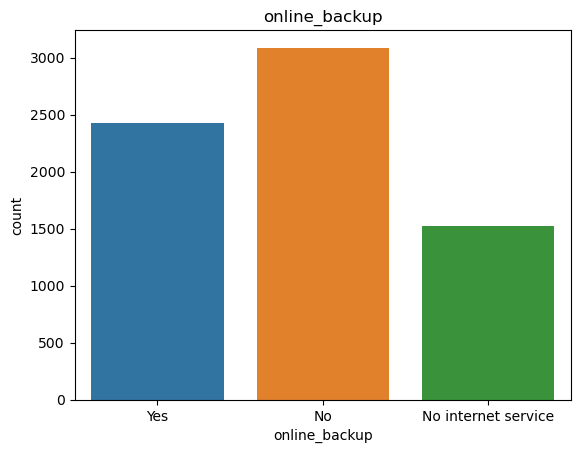

-------------------------------------------------------------


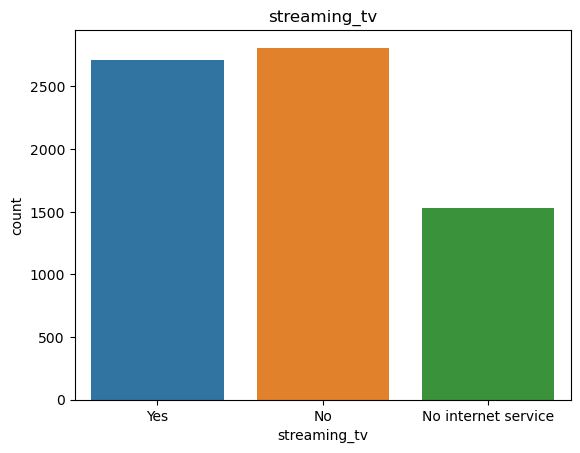

-------------------------------------------------------------


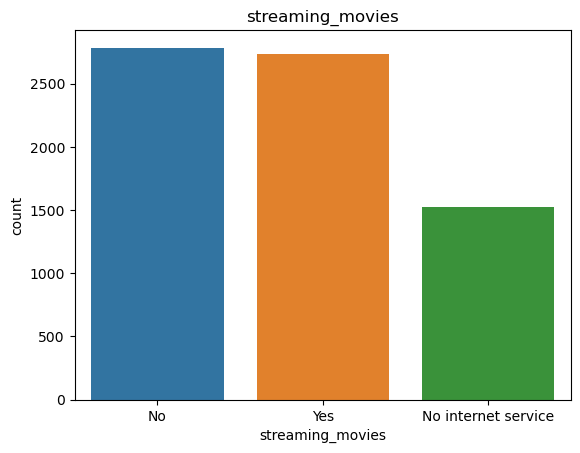

-------------------------------------------------------------


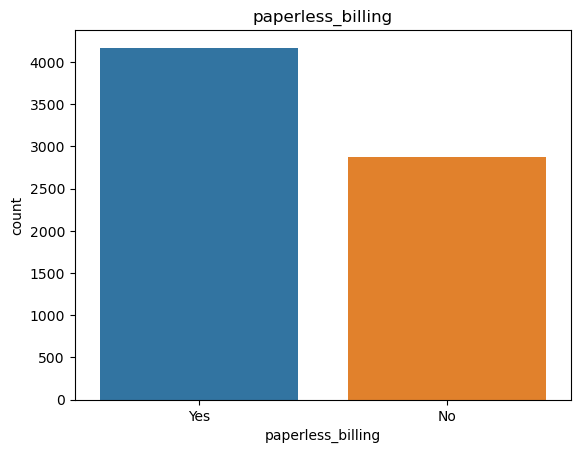

-------------------------------------------------------------


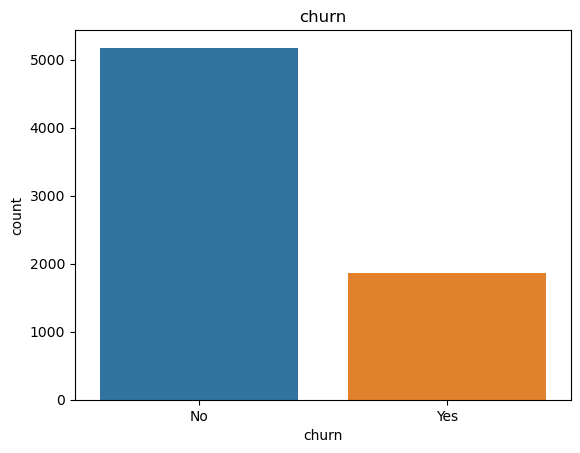

-------------------------------------------------------------


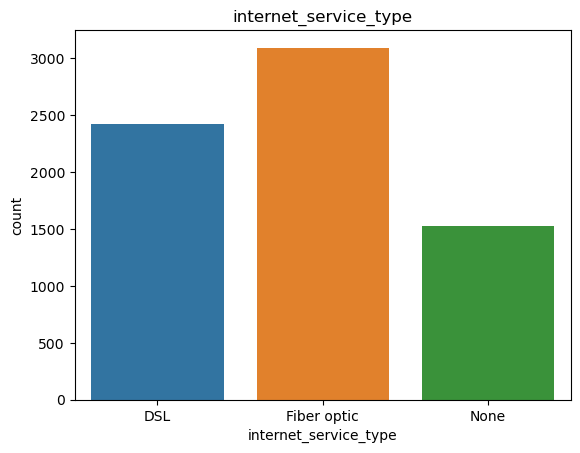

-------------------------------------------------------------


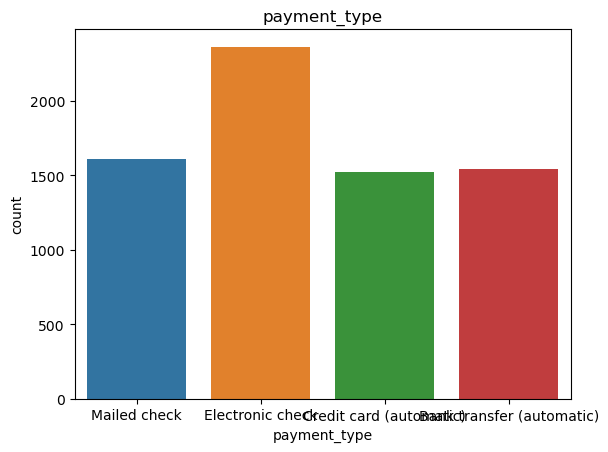

-------------------------------------------------------------


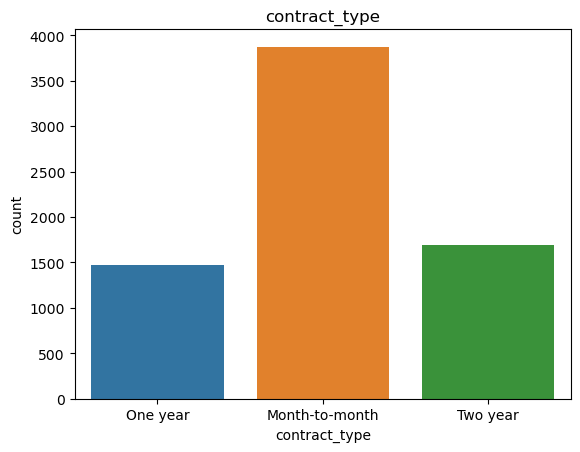

-------------------------------------------------------------


In [62]:
for col in cat_cols:
    sns.countplot(data =cat_cols, x=col)
    t = col.lower()
    plt.title(t)
    plt.show()
    print('''-------------------------------------------------------------''')

<Axes: xlabel='payment_type', ylabel='count'>

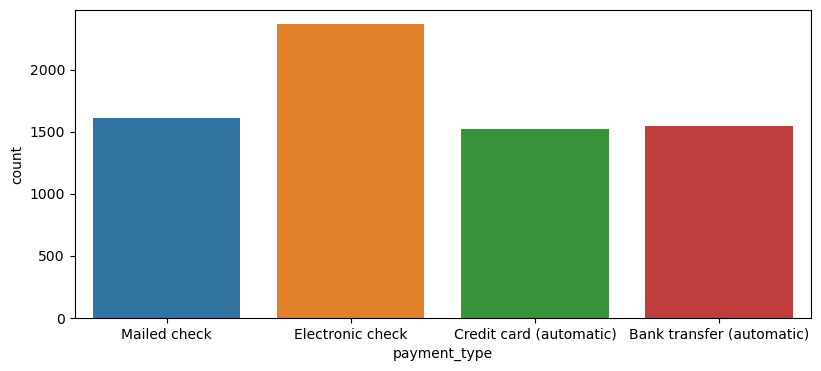

In [84]:
# Resized since names were compressed
plt.figure(figsize=(9.5,4))
sns.countplot(data=telco, x=telco['payment_type'])

In [ ]:
# Observed irregular distributions in phone_service so conducting
# statistical analysis on churn x phone_service

Setting null Hypothesis to examine these two features.

Null $H_0$: There is **no** association between churn & phone service\
Null $H_a$: There *is* an association between churn & phone service

In [93]:
def chi2_test(col1, col2, a=.05):
    '''
    NOTE: Requires stats from scipy in order to function
    A faster way to test two columns desired for cat vs. cat statistical analysis.

    Default alpha is set to .05.

    Outputs crosstab and respective chi2 relative metrics.
    '''
    observed = pd.crosstab(col1, col2)
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    
    if p < a:
        print(f'We reject the null hypothesis with a p-score of:',{round(p,5)})
    else:
        print(f'We fail to reject the null hypothesis with a p-score of:',{round(p,5)})
    
    return observed


In [94]:
chi2_test(telco['churn'],telco['phone_service'])

We fail to reject the null hypothesis with a p-score of: {0.33878}


phone_service,No,Yes
churn,,
No,512,4662
Yes,170,1699


No association for churn and phone_service is observed.

## Explore: Continious Distributions

In [52]:
# compiling continious columns
num_cols = telco[num_cols]

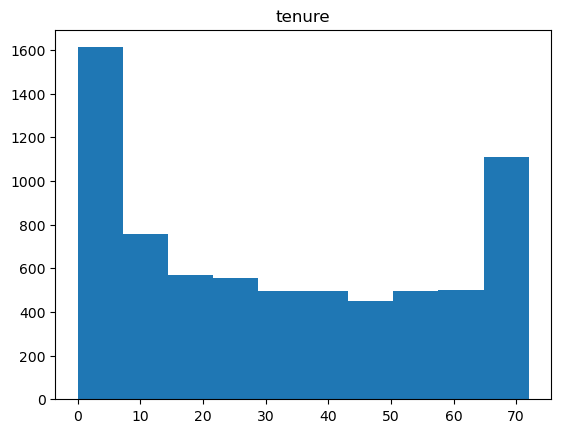

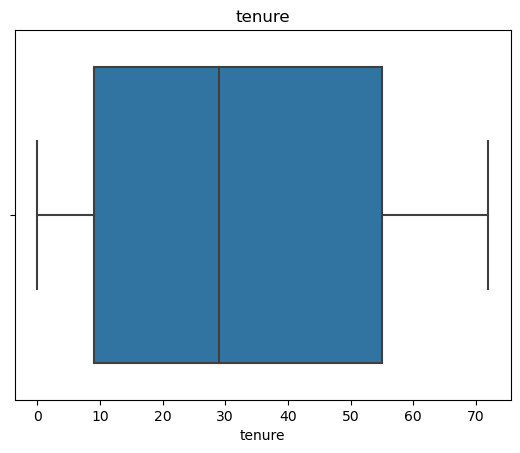

-------------------------------------------------------------


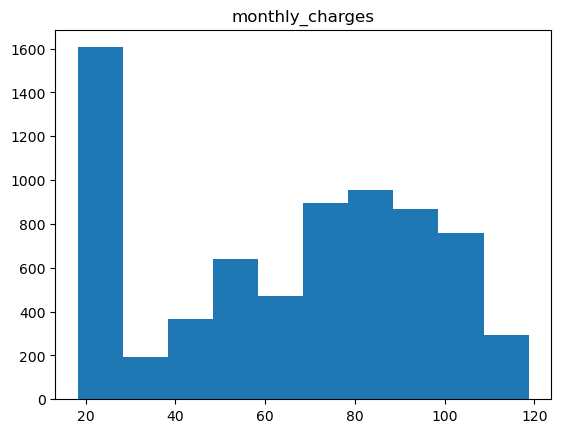

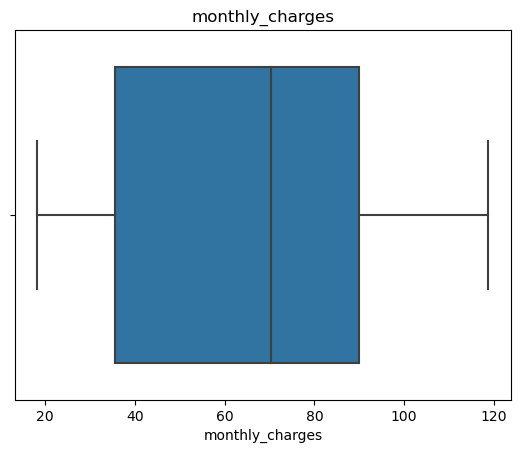

-------------------------------------------------------------


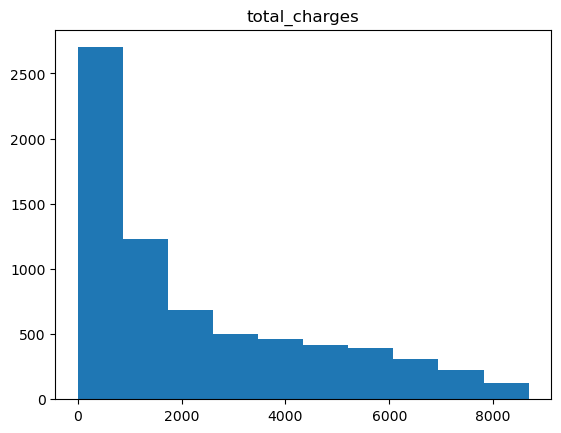

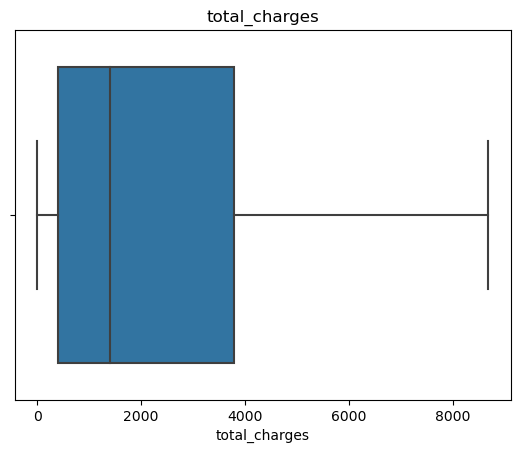

-------------------------------------------------------------


In [57]:
for col in num_cols:
    plt.hist(num_cols[col])
    t = col.lower()
    plt.title(t)
    plt.show()
    sns.boxplot(data=num_cols, x=col)
    plt.title(t)
    plt.show()
    print('''-------------------------------------------------------------''')

## Explore: Correlations with Similar Data

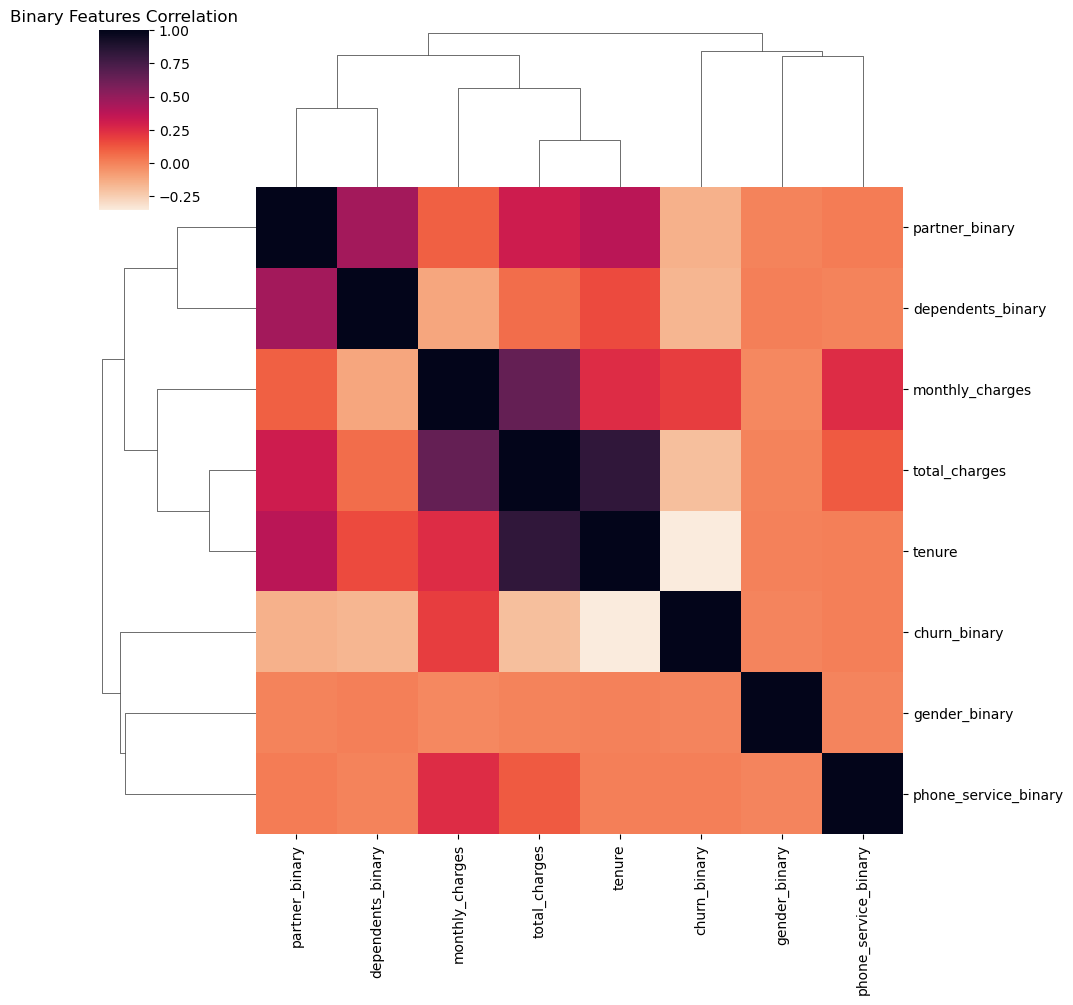

In [23]:
# Clustering correlation grid comparison

# Exploring binary categorical data as well as our two continious values -- total_charges & monthly_charges
telco_grid = telco[['churn_binary','gender_binary','partner_binary','dependents_binary','phone_service_binary'\
    ,'total_charges','monthly_charges','tenure']]
sns_plot = sns.clustermap(telco_grid.corr(),cmap = 'rocket_r')
plt.title('Binary Features Correlation')
plt.show()

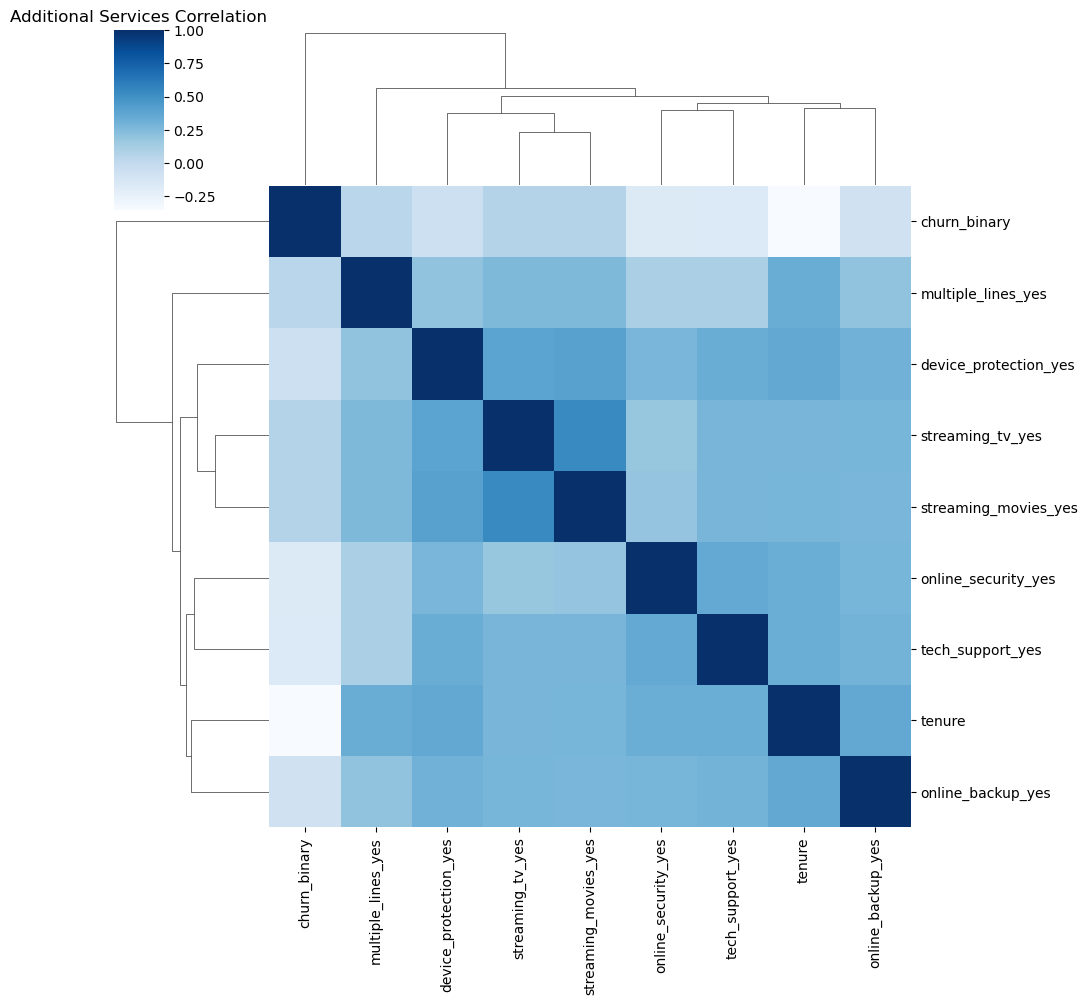

In [96]:
# Clustering correlation grid comparing

# Exploring multicategorical data that is also association as our 'additional services' provided by telco

telco_services = telco[['churn_binary','tenure','multiple_lines_yes','online_security_yes','online_backup_yes','tech_support_yes','streaming_tv_yes',\
                        'streaming_movies_yes','device_protection_yes']]
sns_plot = sns.clustermap(telco_services.corr(),cmap = 'Blues')
plt.title('Additional Services Correlation')
plt.show()

In [102]:
telco.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'streaming_tv', 'streaming_movies',
       'contract_type_id', 'paperless_billing', 'payment_type_id',
       'monthly_charges', 'total_charges', 'churn', 'internet_service_type',
       'payment_type', 'contract_type', 'partner_binary', 'dependents_binary',
       'phone_service_binary', 'gender_binary', 'paperless_billing_binary',
       'churn_binary', 'multiple_lines_no phone service', 'multiple_lines_yes',
       'online_security_yes', 'online_backup_yes',
       'payment_type_credit card (automatic)', 'payment_type_electronic check',
       'payment_type_mailed check', 'contract_type_one year',
       'contract_type_two year', 'tech_support_yes', 'streaming_tv_yes',
       'streaming_movies_yes', 'device_protection_yes',
       'contract_type_month_to_month'],
      dtype='object')

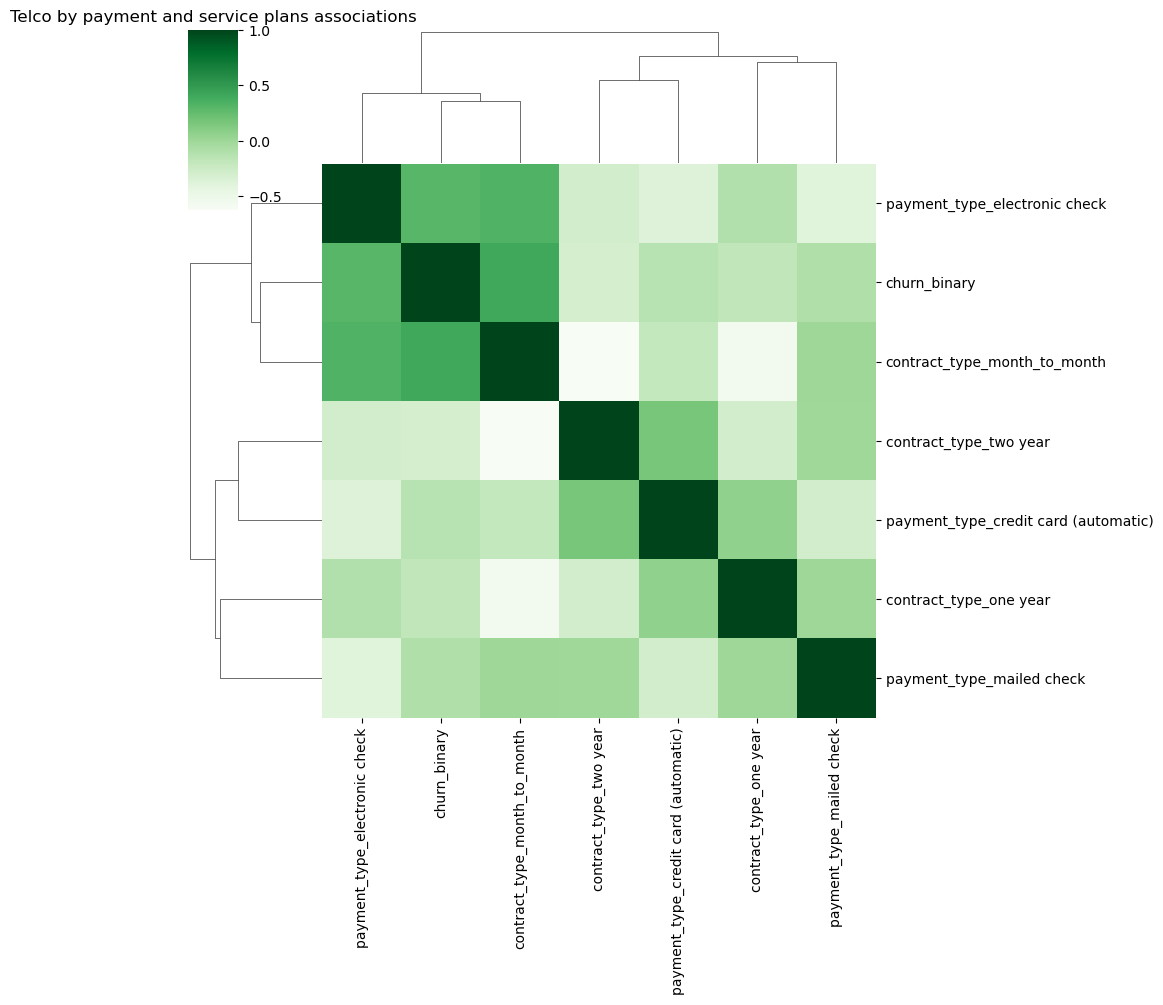

In [107]:
telco_plans = telco[['churn_binary','contract_type_month_to_month','contract_type_two year','contract_type_one year','payment_type_mailed check','payment_type_electronic check','payment_type_credit card (automatic)']]
sns_plot = sns.clustermap(telco_plans.corr(),cmap = 'Greens')
plt.title('Telco by payment and service plans associations')
plt.show()


In [ ]:
# Slight correlation between churn_binary and payment_type_electronic check
# Stronger correlatioin between churn_binary and contract_type_month_to_month